In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing data into dataframe
dataset = pd.read_csv("dataset.csv")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
simpler_data_set = dataset[["Hours", "Scores"]]
simpler_data_set.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
simpler_data_set.shape

(25, 2)

In [7]:
#Input, Output and No of training examples
original_x = simpler_data_set["Hours"].to_numpy()
x = (original_x - np.mean(original_x)) / np.std(original_x)
print(x)
original_y = simpler_data_set["Scores"].to_numpy()
y = (original_y - np.mean(original_y)) / np.std(original_y)
print(y)
m = simpler_data_set.shape[0]

[-1.01532822  0.03556882 -0.7323944   1.40981881 -0.61113705 -1.4195194
  1.69275263  0.19724529  1.32898057 -0.93448999  1.08646587  0.35892176
 -0.20694588 -0.69197529 -1.58119586  1.57149528 -1.01532822 -1.25784293
  0.43975999  0.96520852 -0.93448999 -0.08568853 -0.4898797   0.76311293
  1.12688499]
[-1.23022337 -0.18082023 -0.98805342  0.94930623 -0.86696844 -1.27058503
  1.4740078   0.34388134  1.19147618 -1.06877674  1.35292282  0.42460466
 -0.42299019 -0.38262853 -1.39167001  1.75653941 -0.86696844 -1.1091384
  0.62641295  0.70713627 -0.86696844  0.10171138 -0.66516014  0.98966788
  1.39328448]


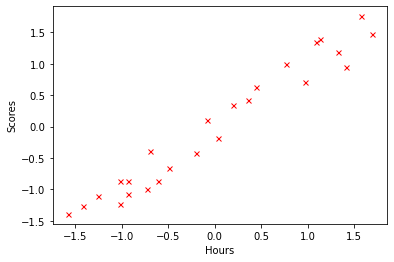

In [10]:
plt.plot(x, y, 'x', color = 'red', markersize = 5);
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

Hypothesis for simple one variable linear regression would be h<sub>θ</sub>(x) = θ<sub>0</sub> + θ<sub>1</sub>x

Cost function = 1/2m * Σ (h<sub>θ</sub>(x) - y)<sup>2</sup>

In [11]:
#initial thetas
theta0 = 0
theta1 = 0

#alpha
alpha = 0.001

cost_array = []
theta1_array = []

In [12]:
#hypo = theta0 + theta1 * x
#Cost Function
h_theta_x_i = theta0 + theta1 * x
initial_cost = 1/(2 * m) * (sum((h_theta_x_i - y) ** 2))
print(initial_cost)
cost_array.append(initial_cost)
theta1_array.append(theta1)

#Update theta
temp0 = theta0 - alpha * ((1/m) * (sum(h_theta_x_i - y)))
temp1 = theta1 - alpha * ((1/m) * (sum((h_theta_x_i - y)  * x)))
theta0 = temp0
theta1 = temp1

#New Cost Function
h_theta_x_i = theta0 + theta1 * x
cost = 1/(2 * m) * (sum((h_theta_x_i - y) ** 2))
print(cost)
cost_array.append(cost)
theta1_array.append(theta1)

0.49999999999999994
0.49904752827719356


In [13]:
#condition inital cost vs cost
iteration = 0 
while (abs(cost - initial_cost)) > 0.0000001:
    iteration += 1
    initial_cost = cost
    #Update theta
    temp0 = theta0 - alpha * ((1/m) * (sum(h_theta_x_i - y)))
    temp1 = theta1 - alpha * ((1/m) * (sum((h_theta_x_i - y)  * x)))
    theta0 = temp0
    theta1 = temp1
    
    #New Cost Function
    h_theta_x_i = theta0 + theta1 * x
    cost = 1/(2 * m) * (sum((h_theta_x_i - y) ** 2))
    if not(iteration % 100):
        print("After " + str(iteration) + ", Cost = " + str(cost))
    cost_array.append(cost)
    theta1_array.append(theta1)
print("Final Cost = " + str(cost))

After 100, Cost = 0.4128111246615554
After 200, Cost = 0.34221379378316596
After 300, Cost = 0.28441937149525637
After 400, Cost = 0.23710603533886523
After 500, Cost = 0.19837302807570642
After 600, Cost = 0.16666429701753413
After 700, Cost = 0.14070598145250832
After 800, Cost = 0.11945523679996303
After 900, Cost = 0.10205833956460737
After 1000, Cost = 0.08781639000632316
After 1100, Cost = 0.07615723467094018
After 1200, Cost = 0.06661248080291937
After 1300, Cost = 0.05879867922120253
After 1400, Cost = 0.052401919702551536
After 1500, Cost = 0.04716522001015162
After 1600, Cost = 0.042878201936637404
After 1700, Cost = 0.03936863960880123
After 1800, Cost = 0.03649554051713582
After 1900, Cost = 0.03414348130876776
After 2000, Cost = 0.032217970790972814
After 2100, Cost = 0.030641653859431264
After 2200, Cost = 0.02935120384853732
After 2300, Cost = 0.0282947784576183
After 2400, Cost = 0.027429937047910954
After 2500, Cost = 0.026721935640169336
After 2600, Cost = 0.026142331

In [14]:
print(len(cost_array))
print(len(theta1_array))

4581
4581


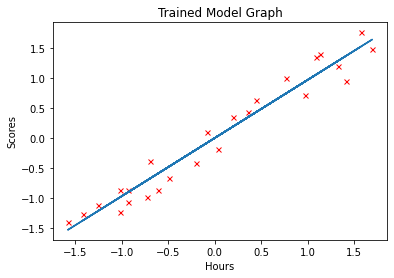

In [15]:
plt.plot(x, y, 'x', color = 'red', markersize = 5);
new_y = theta0 + theta1 * x 
plt.plot(x, new_y)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Trained Model Graph")
plt.show()

In [18]:
#For new predictions
original_input_house_size = float(input("Any number of hours : "))
input_house_size = (original_input_house_size - np.mean(original_x)) / np.std(original_x)
predicted_house_price = theta0 + theta1 * input_house_size
original_predicted_house_price = predicted_house_price * np.std(original_y) + np.mean(original_y)
print("Predicted Score : " + str(original_predicted_house_price))

Any number of hours : 9.25
Predicted Score : 92.48596836718157


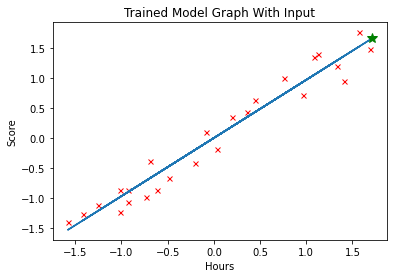

In [19]:
plt.plot(x, y, 'x', color = 'red', markersize = 5);
new_y = theta0 + theta1 * x 
plt.plot(x, new_y)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Trained Model Graph With Input")
plt.plot(input_house_size, predicted_house_price, 'g*', markersize = 10)
plt.show()